<a href="https://colab.research.google.com/github/witchfrompwr1304/MachineLearning/blob/main/Machine_Learning_Przygotowanie_danych_do_modelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocessing danych:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Utworzenie kopii danych](#2)
4. [Zmiana typu danych i wstepna eksploracja](#3)
5. [LabelEncoder](#4)
6. [OneHotEncoder](#5)
7. [Pandas *get_dummies()*](#6)
8. [Standaryzacja -StandardScaler](#7)
9. [Przygotowanie danych do modelu](#8)
10. [Braki danych](#9)
11. [Uzupełnienie braków danych](#10)
12. [Braki danych w szeregach czasowych](#11)
13. [Ekstrakcja cech](#12)
14. [Zbiór treningowy, zbiór walidacyjny i zbiór testowy](#13)


### <a name='0'></a> Import bibliotek

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import sklearn


sklearn.__version__

'1.0.2'

### <a name='1'></a> Wygenerowanie danych

In [ ]:
data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male','female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']

}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


### <a name='2'></a> Utworzenie kopii danych

In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


### <a name='3'></a> Zmiana typu danych i wstępna eksploracja

In [ ]:
for col in ['size', 'color', 'gender', 'bought']:
  df[col] = df[col].astype('category')

df['weight'] = df['weight'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 740.0 bytes


In [ ]:
df.describe()

,price,weight
count,5.000000,5.000000
mean,119.000000,408.000000
std,48.476799,75.299402
min,79.000000,300.000000
25%,89.000000,380.000000
50%,99.000000,410.000000
75%,129.000000,450.000000
max,199.000000,500.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [ ]:
df.describe(include = ['category'])

,size,color,gender,bought
count,5,5,5,5
unique,3,3,2,2
top,L,green,female,yes
freq,2,2,3,3


In [ ]:
df.describe(include = ['category']).T

,count,unique,top,freq
size,5,3,L,2
color,5,3,green,2
gender,5,2,female,3
bought,5,2,yes,3


### <a name='4'></a> Label Encoder

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(df['bought'])
le.transform(df['bought'])

array([1, 0, 1, 0, 1])

In [ ]:
le.fit_transform(df['bought'])

array([1, 0, 1, 0, 1])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
df['bought'] = le.fit_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [ ]:
le.inverse_transform(df['bought'])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


### <a name='5'></a> OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse= False)
encoder.fit(df[['size']])

OneHotEncoder(sparse=False)

In [ ]:
encoder.transform(df[['size']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(df[['size']])
encoder.transform(df[['size']])

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


### <a name='6'></a> Pandas get_dummies()

In [ ]:
pd.get_dummies(data=df)

,price,weight,bought,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male
0,199.0,500.0,1,0,0,1,0,0,1,1,0
1,89.0,450.0,0,1,0,0,0,1,0,0,1
2,99.0,300.0,1,0,1,0,1,0,0,0,1
3,129.0,380.0,0,1,0,0,0,1,0,1,0
4,79.0,410.0,1,0,1,0,0,0,1,1,0


In [ ]:
pd.get_dummies(data=df, drop_first=True)

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [ ]:
pd.get_dummies(data=df, drop_first=True, prefix='new')

,price,weight,bought,new_M,new_XL,new_green,new_red,new_male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [ ]:
pd.get_dummies(data=df, drop_first=True, prefix_sep='-')

,price,weight,bought,size-M,size-XL,color-green,color-red,gender-male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [ ]:
pd.get_dummies(data=df, drop_first=True, prefix_sep='_')

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,199.0,500.0,1,0,1,0,1,0
1,89.0,450.0,0,0,0,1,0,1
2,99.0,300.0,1,1,0,0,0,1
3,129.0,380.0,0,0,0,1,0,0
4,79.0,410.0,1,1,0,0,1,0


In [ ]:
pd.get_dummies(data=df, drop_first=True, columns=['size'])

,color,gender,price,weight,bought,size_M,size_XL
0,red,female,199.0,500.0,1,0,1
1,green,male,89.0,450.0,0,0,0
2,blue,male,99.0,300.0,1,1,0
3,green,female,129.0,380.0,0,0,0
4,red,female,79.0,410.0,1,1,0


### <a name='7'></a> Standaryzacja - StandardScaler

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [ ]:
print(f"{df['price']}\n")
print(f"Średnia: {df['price'].mean()}")
print(f"Odchylenie standardowe: {df['price'].std(): .4f}")

0    199.0
1     89.0
2     99.0
3    129.0
4     79.0
Name: price, dtype: float64

Średnia: 119.0
Odchylenie standardowe:  48.4768


In [ ]:
(df['price'] - df['price'].mean()) / df['price'].std()

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [ ]:
def standarize(x):

  return(x - x.mean()) / x.std()

standarize(df['price'])

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
scale(df['price'])

array([ 1.84506242, -0.69189841, -0.4612656 ,  0.2306328 , -0.92253121])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df[['price']])
scaler.transform(df[['price']])

array([[ 1.84506242],
       [-0.69189841],
       [-0.4612656 ],
       [ 0.2306328 ],
       [-0.92253121]])

In [ ]:
scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price','weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,1
1,L,green,male,-0.691898,0.623610,0
2,M,blue,male,-0.461266,-1.603567,1
3,L,green,female,0.230633,-0.415740,0
4,M,red,female,-0.922531,0.029696,1


### <a name='8'></a> Przygotowanie danych do modelu

In [ ]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['bought'] = le.fit_transform(df['bought'])

scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])

df = pd.get_dummies(data=df, drop_first=True)

In [ ]:
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,0,1,0,1,0
1,-0.691898,0.623610,0,0,0,1,0,1
2,-0.461266,-1.603567,1,1,0,0,0,1
3,0.230633,-0.415740,0,0,0,1,0,0
4,-0.922531,0.029696,1,1,0,0,1,0


### <a name='9'></a>  Braki danych

In [ ]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import sklearn

In [ ]:
data2 = {
    'size': ['XL', 'L', 'M', np.nan, 'L', 'M'],
    'color': ['red', 'green', 'blue', 'red', 'green', 'red'],
    'gender': ['female', 'male', np.nan, 'male','female', 'female'],
    'price': [199.0, 89.0, np.nan, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, np.nan, 380, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']

}

df_raw = pd.DataFrame(data=data2)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,red,male,99.0,NaN,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,NaN,no


In [ ]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,red,male,99.0,NaN,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,NaN,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [ ]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

5

In [ ]:
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

### <a name='10'></a> Uzupełnianie braków - Simplelmputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy ='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,red,male,99.0,NaN,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,NaN,no


In [ ]:
imputer.statistics_

array([407.5])

In [ ]:
imputer.transform(df[['weight']])

array([[500. ],
       [450. ],
       [300. ],
       [407.5],
       [380. ],
       [407.5]])

In [ ]:
df['weight'] = imputer.transform(df[['weight']])

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,red,male,99.0,407.5,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,407.5,no


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [ 99.],
       [129.],
       [ 79.]])

In [ ]:
df['price'] = imputer.fit_transform(df[['price']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,99.0,300.0,yes
3,NaN,red,male,99.0,407.5,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,407.5,no


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value= 'L')
imputer.fit_transform(df[['size']])
df['size'] = imputer.fit_transform(df[['size']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,99.0,300.0,yes
3,L,red,male,99.0,407.5,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,407.5,no


In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,red,male,99.0,NaN,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,NaN,no


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['L'],
       ['M']], dtype=object)

In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [ ]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,red,male,99.0,NaN,no
5,M,red,female,79.0,NaN,no


In [ ]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,L,green,female,129.0,380.0,yes


In [ ]:
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [ ]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,L,green,female,129.0,380.0,yes


In [ ]:
df[~pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,red,male,99.0,NaN,no
5,M,red,female,79.0,NaN,no


In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,red,male,99.0,NaN,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,NaN,no


In [ ]:
df.fillna(value = 'brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,red,male,99.0,brak,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,brak,no


In [ ]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,red,male,99.0,0.0,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,0.0,no


In [ ]:
df['size'].fillna(value='L', inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,red,male,99.0,NaN,no
4,L,green,female,129.0,380.0,yes
5,M,red,female,79.0,NaN,no


In [ ]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,L,green,female,129.0,380.0,yes


### <a name='11'></a> Braki danych w szeregach czasowych




In [ ]:
data = {'price': [108, 109, 110, 109, np.nan, np.nan, 112, 111, 112, 113]}

date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index= date_range)
df 

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,109.0
2020-01-01 13:00:00,NaN
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,112.0
2020-01-01 16:00:00,111.0
2020-01-01 17:00:00,112.0
2020-01-01 18:00:00,113.0


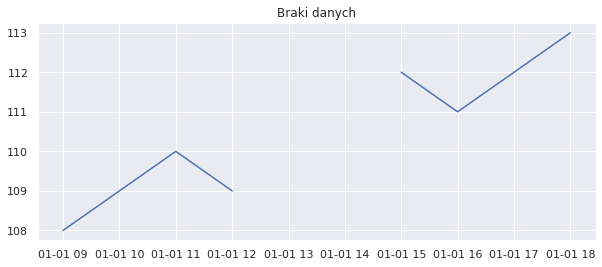

In [ ]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10,4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [ ]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400,
        title='Szeregi czasowe- braki danych')


In [ ]:
df_plotly = df_plotly.dropna()

px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych - usunięcie braków')

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0) 
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe - braki danych - wstawianie 0.')

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
       title='Szeregi czasowe- braki danych - wstawianie średniej.')

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title='Szeregi czasowe - braki danych - interpolacja.')

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method= 'ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title= 'Szeregi czasowe - braki danych - forward fill.')

In [ ]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400,
        title= 'Szeregi czasowe - braki danych.')

### <a name='12'></a>  Ekstrakcja cech


In [ ]:
def fetch_financial_data(company='AMZN'):
  """
  This function fetchen stock market quotation.

  """
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df_raw = fetch_financial_data()
df_raw.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-22,2965.00,2992.30,2873.9501,2887.00,3653929
2022-04-21,3094.28,3134.76,2951.7900,2965.92,3198466
2022-04-20,3152.05,3152.05,3072.0700,3079.96,2981501
2022-04-19,3040.59,3172.98,3031.0100,3162.31,2746321
2022-04-18,3030.47,3080.79,3005.0100,3055.70,2325676


In [ ]:
df = df_raw.copy()
df = df[:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2022-04-22 to 2022-04-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
 1   High    5 non-null      float64
 2   Low     5 non-null      float64
 3   Close   5 non-null      float64
 4   Volume  5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 240.0 bytes


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-22,2965.00,2992.30,2873.9501,2887.00,3653929
2022-04-21,3094.28,3134.76,2951.7900,2965.92,3198466
2022-04-20,3152.05,3152.05,3072.0700,3079.96,2981501
2022-04-19,3040.59,3172.98,3031.0100,3162.31,2746321
2022-04-18,3030.47,3080.79,3005.0100,3055.70,2325676


In [ ]:
df['Volume'] = df['Volume'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2022-04-22 to 2022-04-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
 1   High    5 non-null      float64
 2   Low     5 non-null      float64
 3   Close   5 non-null      float64
 4   Volume  5 non-null      float64
dtypes: float64(5)
memory usage: 240.0 bytes


#### Generowanie nowych zmiennych

In [ ]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df

,Open,High,Low,Close,Volume,day,month,year
Date,,,,,,,,
2022-04-22,2965.00,2992.30,2873.9501,2887.00,3653929.0,22,4,2022
2022-04-21,3094.28,3134.76,2951.7900,2965.92,3198466.0,21,4,2022
2022-04-20,3152.05,3152.05,3072.0700,3079.96,2981501.0,20,4,2022
2022-04-19,3040.59,3172.98,3031.0100,3162.31,2746321.0,19,4,2022
2022-04-18,3030.47,3080.79,3005.0100,3055.70,2325676.0,18,4,2022


#### Dyskretyzacja zmiennej ciągłej

In [ ]:
df = pd.DataFrame(data={'height': [175., 178.5, 185., 191., 184.5, 183.,168.]})
df

,height
0,175.0
1,178.5
2,185.0
3,191.0
4,184.5
5,183.0
6,168.0


In [ ]:
df['height_cut'] = pd.cut(x=df.height, bins=3)
df

,height,height_cut
0,175.0,"(167.977, 175.667]"
1,178.5,"(175.667, 183.333]"
2,185.0,"(183.333, 191.0]"
3,191.0,"(183.333, 191.0]"
4,184.5,"(183.333, 191.0]"
5,183.0,"(175.667, 183.333]"
6,168.0,"(167.977, 175.667]"


In [ ]:
df['height_cut'] = pd.cut(x=df.height, bins=(160, 175, 180, 195))
df

,height,height_cut
0,175.0,"(160, 175]"
1,178.5,"(175, 180]"
2,185.0,"(180, 195]"
3,191.0,"(180, 195]"
4,184.5,"(180, 195]"
5,183.0,"(180, 195]"
6,168.0,"(160, 175]"


In [ ]:
df['height_cut'] = pd.cut(x=df.height, bins=(160, 175, 180, 195), labels=['small', 'medium', 'high'])
df

,height,height_cut
0,175.0,small
1,178.5,medium
2,185.0,high
3,191.0,high
4,184.5,high
5,183.0,high
6,168.0,small


In [ ]:
pd.get_dummies(df, drop_first=True, prefix='height')

,height,height_medium,height_high
0,175.0,0,0
1,178.5,1,0
2,185.0,0,1
3,191.0,0,1
4,184.5,0,1
5,183.0,0,1
6,168.0,0,0


#### Ekstrakcja cech

In [ ]:
df = pd.DataFrame(data={'lang': [['PL', 'ENG'], ['GER', 'ENG', 'PL', 'FRA'], ['RUS']]})
df

,lang
0,"[PL, ENG]"
1,"[GER, ENG, PL, FRA]"
2,[RUS]


In [ ]:
df['lang_number'] = df['lang'].apply(len)
df

,lang,lang_number
0,"[PL, ENG]",2
1,"[GER, ENG, PL, FRA]",4
2,[RUS],1


In [ ]:
df['PL_flag'] = df['lang'].apply(lambda x: 1 if 'PL' in x else 0)
df

,lang,lang_number,PL_flag
0,"[PL, ENG]",2,1
1,"[GER, ENG, PL, FRA]",4,1
2,[RUS],1,0


In [ ]:
df = pd.DataFrame(data={'website': ['wp.pl', 'onet.pl', 'google.com']})
df

,website
0,wp.pl
1,onet.pl
2,google.com


In [ ]:
df.website.str.split('.', expand=True)

,0,1
0,wp,pl
1,onet,pl
2,google,com


In [ ]:
new = df.website.str.split('.', expand=True)
df['portal'] = new[0]
df['extension'] = new[1]
df

,website,portal,extension
0,wp.pl,wp,pl
1,onet.pl,onet,pl
2,google.com,google,com


### <a name='13'></a> Zbiór treningowy, zbiór walidacyjny, zbiór testowy

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))

sns.set()
sklearn.__version__

'1.0.2'

#### Załadowanie danych

In [ ]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(raw_data_copy['DESCR'])

#### Przygotowanie danych

In [ ]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[5.10 3.50 1.40 0.20]
 [4.90 3.00 1.40 0.20]
 [4.70 3.20 1.30 0.20]
 [4.60 3.10 1.50 0.20]
 [5.00 3.60 1.40 0.20]]

[0 0 0 0 0]


In [ ]:
raw_data_copy

In [ ]:
all_data = np.c_[data, target]
all_data[:5]

array([[5.10, 3.50, 1.40, 0.20, 0.00],
       [4.90, 3.00, 1.40, 0.20, 0.00],
       [4.70, 3.20, 1.30, 0.20, 0.00],
       [4.60, 3.10, 1.50, 0.20, 0.00],
       [5.00, 3.60, 1.40, 0.20, 0.00]])

In [ ]:
df = pd.DataFrame(data=all_data, columns=raw_data.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


In [ ]:
df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

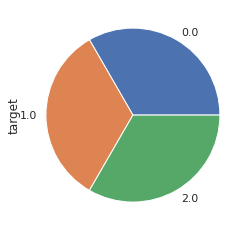

In [ ]:
df.target.value_counts().plot(kind='pie')

In [ ]:
data = df.copy()
target = data.pop('target')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

#### Podział danych na zbiór treningowy i testowy - iris data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()})')

X_train shape (112, 4)
y_train shape (112,)
X_test shape (38, 4)
y_test shape (38,)

Test ratio: 0.25

y_train:
1.0    39
2.0    38
0.0    35
Name: target, dtype: int64

y_test:
0.0    15
2.0    12
1.0    11
Name: target, dtype: int64)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()})')

X_train shape (105, 4)
y_train shape (105,)
X_test shape (45, 4)
y_test shape (45,)

Test ratio: 0.30

y_train:
1.0    37
2.0    37
0.0    31
Name: target, dtype: int64

y_test:
0.0    19
1.0    13
2.0    13
Name: target, dtype: int64)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.9, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()})')

X_train shape (135, 4)
y_train shape (135,)
X_test shape (15, 4)
y_test shape (15,)

Test ratio: 0.10

y_train:
2.0    47
1.0    44
0.0    44
Name: target, dtype: int64

y_test:
1.0    6
0.0    6
2.0    3
Name: target, dtype: int64)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size= 0.1, stratify=target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()})')

X_train shape (135, 4)
y_train shape (135,)
X_test shape (15, 4)
y_test shape (15,)

Test ratio: 0.10

y_train:
0.0    45
2.0    45
1.0    45
Name: target, dtype: int64

y_test:
1.0    5
2.0    5
0.0    5
Name: target, dtype: int64)


In [ ]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(raw_data_copy['DESCR'])

In [ ]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[17.99 10.38 122.80 1001.00 0.12 0.28 0.30 0.15 0.24 0.08 1.09 0.91 8.59 153.40 0.01 0.05 0.05 0.02 0.03 0.01 25.38 17.33 184.60 2019.00 0.16 0.67 0.71 0.27 0.46 0.12]
 [20.57 17.77 132.90 1326.00 0.08 0.08 0.09 0.07 0.18 0.06 0.54 0.73 3.40 74.08 0.01 0.01 0.02 0.01 0.01 0.00 24.99 23.41 158.80 1956.00 0.12 0.19 0.24 0.19 0.28 0.09]
 [19.69 21.25 130.00 1203.00 0.11 0.16 0.20 0.13 0.21 0.06 0.75 0.79 4.58 94.03 0.01 0.04 0.04 0.02 0.02 0.00 23.57 25.53 152.50 1709.00 0.14 0.42 0.45 0.24 0.36 0.09]
 [11.42 20.38 77.58 386.10 0.14 0.28 0.24 0.11 0.26 0.10 0.50 1.16 3.44 27.23 0.01 0.07 0.06 0.02 0.06 0.01 14.91 26.50 98.87 567.70 0.21 0.87 0.69 0.26 0.66 0.17]
 [20.29 14.34 135.10 1297.00 0.10 0.13 0.20 0.10 0.18 0.06 0.76 0.78 5.44 94.44 0.01 0.02 0.06 0.02 0.02 0.01 22.54 16.67 152.20 1575.00 0.14 0.20 0.40 0.16 0.24 0.08]]

[0 0 0 0 0]


In [ ]:
all_data = np.c_[data, target]
all_data[:5]

array([[17.99, 10.38, 122.80, 1001.00, 0.12, 0.28, 0.30, 0.15, 0.24, 0.08, 1.09, 0.91, 8.59, 153.40, 0.01, 0.05, 0.05, 0.02, 0.03, 0.01, 25.38, 17.33, 184.60, 2019.00, 0.16, 0.67, 0.71, 0.27, 0.46, 0.12, 0.00],
       [20.57, 17.77, 132.90, 1326.00, 0.08, 0.08, 0.09, 0.07, 0.18, 0.06, 0.54, 0.73, 3.40, 74.08, 0.01, 0.01, 0.02, 0.01, 0.01, 0.00, 24.99, 23.41, 158.80, 1956.00, 0.12, 0.19, 0.24, 0.19, 0.28, 0.09, 0.00],
       [19.69, 21.25, 130.00, 1203.00, 0.11, 0.16, 0.20, 0.13, 0.21, 0.06, 0.75, 0.79, 4.58, 94.03, 0.01, 0.04, 0.04, 0.02, 0.02, 0.00, 23.57, 25.53, 152.50, 1709.00, 0.14, 0.42, 0.45, 0.24, 0.36, 0.09, 0.00],
       [11.42, 20.38, 77.58, 386.10, 0.14, 0.28, 0.24, 0.11, 0.26, 0.10, 0.50, 1.16, 3.44, 27.23, 0.01, 0.07, 0.06, 0.02, 0.06, 0.01, 14.91, 26.50, 98.87, 567.70, 0.21, 0.87, 0.69, 0.26, 0.66, 0.17, 0.00],
       [20.29, 14.34, 135.10, 1297.00, 0.10, 0.13, 0.20, 0.10, 0.18, 0.06, 0.76, 0.78, 5.44, 94.44, 0.01, 0.02, 0.06, 0.02, 0.02, 0.01, 22.54, 16.67, 152.20, 1575.

In [ ]:
df = pd.DataFrame(data= all_data, columns=list(raw_data['feature_names']) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [ ]:
data = df.copy()
target = data.pop('target')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=40)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ntarget:\n{target.value_counts() / len(target)}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_train:\n{y_train.value_counts() / len(y_train)}')
print(f'\ny_test:\n{y_test.value_counts()})')
print(f'\ny_test:\n{y_test.value_counts() / len(y_test)}')

X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)

Test ratio: 0.25

target:
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train:
1.0    259
0.0    167
Name: target, dtype: int64

y_train:
1.0    0.607981
0.0    0.392019
Name: target, dtype: float64

y_test:
1.0    98
0.0    45
Name: target, dtype: int64)

y_test:
1.0    0.685315
0.0    0.314685
Name: target, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=40, stratify=target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ntarget:\n{target.value_counts() / len(target)}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_train:\n{y_train.value_counts() / len(y_train)}')
print(f'\ny_test:\n{y_test.value_counts()})')
print(f'\ny_test:\n{y_test.value_counts() / len(y_test)}')

X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)

Test ratio: 0.25

target:
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train:
1.0    267
0.0    159
Name: target, dtype: int64

y_train:
1.0    0.626761
0.0    0.373239
Name: target, dtype: float64

y_test:
1.0    90
0.0    53
Name: target, dtype: int64)

y_test:
1.0    0.629371
0.0    0.370629
Name: target, dtype: float64
